In [1]:
import cv2
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#IMAGE PRAOCESSING

#Load image from harddisk
img = cv2.imread("audi.jpeg")
cv2.imshow('Car Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Image crop(resize) and save image (MANUEL)
resized_img = cv2.resize(img, None, fx=0.5, fy=0.5) #Adjust for your desire
cv2.imshow('img_resized', img)
cv2.imwrite('Cropped Image.jpg', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#  IMAGE PRAOCESSING
#   -Image Analysis

#Convert To Gray
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray Image", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Convert to Black&White
(thresh, blackAndWhiteImg) = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow('Black&White Image', blackAndWhiteImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

#2-D FAST FOURIER TRANSFORM
img = cv2.imread('audi.jpeg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [ ]:
#Adding Noise / Gaussian Kernel

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('audi.jpeg')
gaussianBlur = cv2.blur(img,(5,5))

cv2.imshow('Gaussian Filter', gaussianBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Adding Noise / Pepper & Salt

def add_noise(img):

	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300, 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

# salt-and-pepper noise can be applied only to grayscale images
img = cv2.imread('audi.jpeg', cv2.IMREAD_GRAYSCALE)

#Storing the image
cv2.imwrite('salt-and-pepper-audi.jpg', add_noise(img))

#### imshow() şeklinde göstermek istersen
img_noised = cv2.imread('salt-and-pepper-audi.jpg')
cv2.imshow('salt and pepper noised', img_noised)

In [6]:
#FILTERING

import cv2
import numpy as np
from matplotlib import pyplot as plt

#MEAN FILTER
img = cv2.imread('audi.jpeg')
mean = cv2.blur(img,(5,5))
cv2.imshow('Mean Filtered', mean)
cv2.waitKey(0)
cv2.destroyAllWindows()

#MEDIAN FILTER
img = cv2.imread('audi.jpeg')
median = cv2.medianBlur(img,5)
cv2.imshow('Median Filtered', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

#GAUSSIAN FILTER
img = cv2.imread('audi.jpeg')
gaussian = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('Gaussian Filter', gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

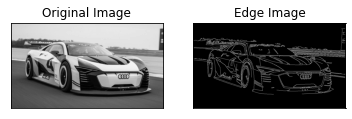

In [1]:
#EDGE DETECTION (CANNY EDGE DETECTOR)
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('audi.jpeg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#CORNER DETECTION (HARRIS CORNER DETECTOR)
import numpy as np
import cv2 as cv
filename = 'chessboard.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()